# 1. Dataset import and dataset information

In [82]:
import pandas as pd
import seaborn as sns
dataset = pd.read_csv("incident_event_log.csv")
dataset.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

In [10]:
data_copy = dataset

In [11]:
data_copy.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [12]:
import numpy as np
data_copy = data_copy.replace("?", np.nan)

In [13]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141683 non-null object
opened_by                  136877 non-null object
opened_at                  141712 non-null object
sys_created_by             88636 non-null object
sys_created_at             88636 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141636 non-null object
category                   141634 non-null object
subcategory                141601 non-null objec

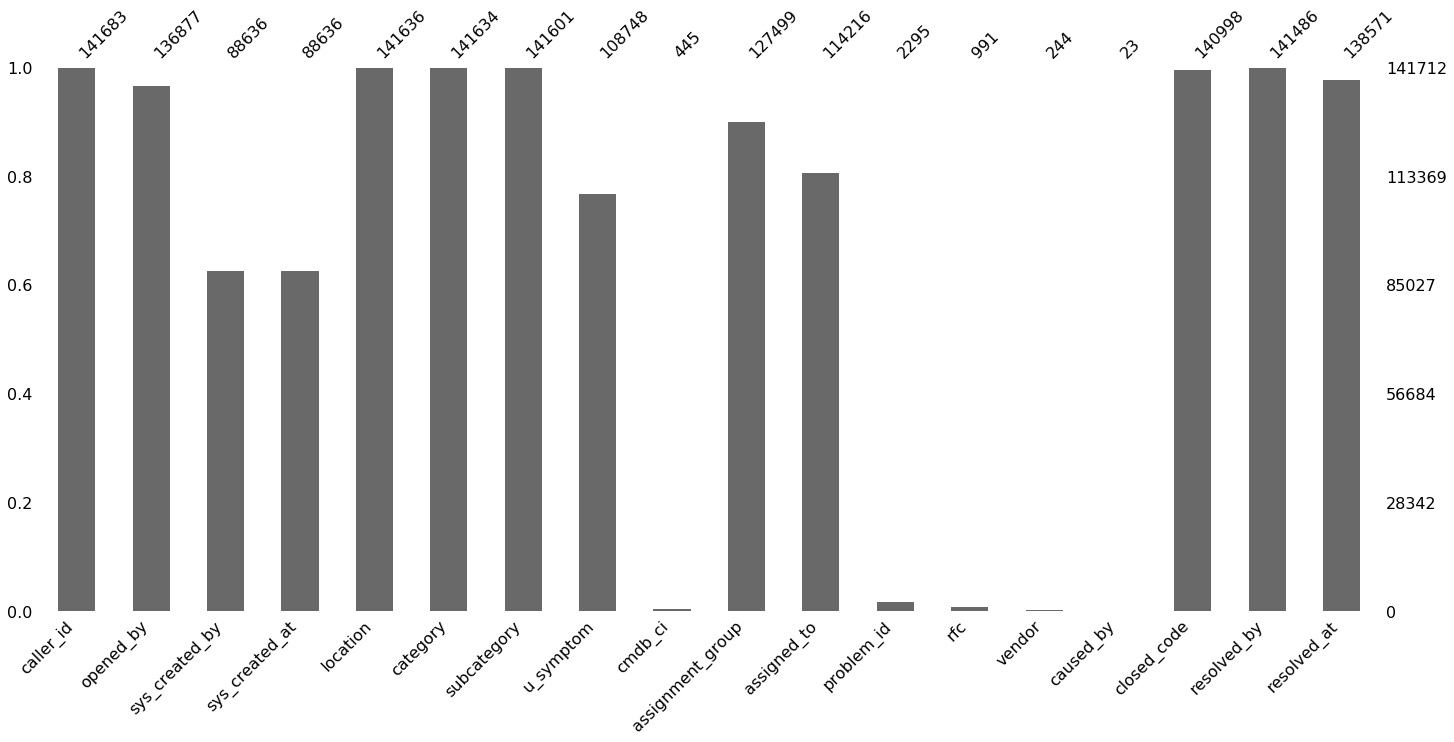

In [141]:
import missingno as msno
column=[column for column in data_copy if data_copy[column].isna().sum()>0 ]
msno.bar(data_copy[column])

### it is clear that the na value of "cmdb_ci", "problem_id", "rfc", "vendor" and "caused_by" column

In [14]:
dataset.describe()

,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

In [83]:
dataset = dataset.drop(["cmdb_ci","problem_id","rfc","vendor","caused_by"],axis = 1)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 31 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

## 1.2 specific category and information of variables

In [19]:
# define a function, try to find the catogery and its number of each column
from collections import defaultdict

def column_to_list(dataset,name_of_list):
    alist = dataset[name_of_list].tolist()
    return alist

def sum_of_catogery(catogery_list):
    dic = defaultdict(int)
    for a in catogery_list:
        dic[a] += 1
    
    return dic

def df_to_ddic(dataset,column_name):
    a = column_to_list(dataset,column_name)
    dic = sum_of_catogery(a)
    
    return dic

In [20]:
# sort the dictionary by key
def sort_by_key(dd):
    d = dict(dd)
    d = sorted(d.items(), key = lambda item:item[0])

    return d

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


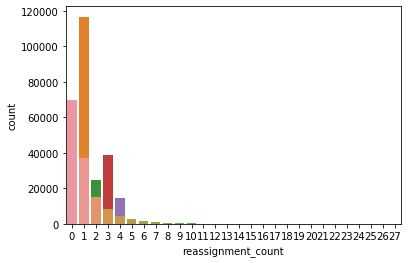

In [166]:
%matplotlib inline
column = [columns for columns in dataset]
for i in range(0,4):
    print(sns.countplot(x = str(column[i]), data = dataset))

In [167]:
sns.countplot(x = 'vendor', data = dataset)

ValueError: Could not interpret input 'vendor'

In [21]:
incident_state_dic = df_to_ddic(dataset, "incident_state")
incident_state_dic

defaultdict(int,
            {'New': 36407,
             'Resolved': 25751,
             'Closed': 24985,
             'Active': 38716,
             'Awaiting User Info': 14642,
             'Awaiting Problem': 461,
             'Awaiting Vendor': 707,
             'Awaiting Evidence': 38,
             '-100': 5})

In [22]:
made_sla_dic = df_to_ddic(dataset,"made_sla")
made_sla_dic, len(made_sla_dic)

(defaultdict(int, {True: 132497, False: 9215}), 2)

In [23]:
contact_type_dic = df_to_ddic(dataset,"contact_type")
contact_type_dic, len(contact_type_dic)

(defaultdict(int,
             {'Phone': 140462,
              'Email': 220,
              'Self service': 995,
              'Direct opening': 17,
              'IVR': 18}),
 5)

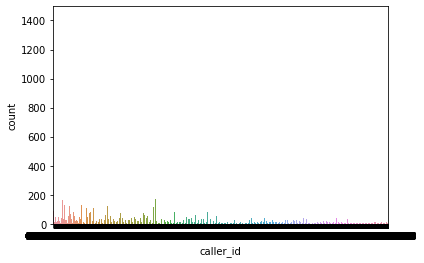

In [24]:
caller_id_ddic = df_to_ddic(dataset,"caller_id")
caller_id_ddic
sns.countplot(dataset["caller_id"])

In [28]:
impact_dict = df_to_ddic(dataset, "impact")
impact_dict

defaultdict(int, {'2 - Medium': 134335, '1 - High': 3491, '3 - Low': 3886})

In [29]:
urgency_dict = df_to_ddic(dataset, "urgency")
urgency_dict

defaultdict(int, {'2 - Medium': 134094, '3 - Low': 3598, '1 - High': 4020})

In [30]:
priority_dict = df_to_ddic(dataset, "priority")
priority_dict

defaultdict(int,
            {'3 - Moderate': 132452,
             '2 - High': 2972,
             '4 - Low': 4030,
             '1 - Critical': 2258})

In [26]:
notify_dict = df_to_ddic(dataset, "notify")
notify_dict

defaultdict(int, {'Do Not Notify': 141593, 'Send Email': 119})

In [31]:
resolved_at_dic = df_to_ddic(dataset, "resolved_at")
r = dict(resolved_at_dic)
r["?"]
# how many "?" values considered as NA does "resolved_at" column have?

3141

In [32]:
closed_at_ddic = df_to_ddic(dataset,"closed_at")

# Dose "closed_at" column have "?" value?
c = dict(closed_at_ddic)
if "?" in c.keys():
    print("True")
else: 
    print("False")

False


## 1.3 plot the "resolved_at" and "closed_at"

In [84]:
# delete the "?" value of "resolved_at" column in dataframe and plot it with "closed_at" column
df2=dataset[~dataset['resolved_at'].isin(["?"])]
len(df2)

138571

In [61]:
resolved_at_dict2 = df_to_ddic(df2,"resolved_at")
r2 = dict(resolved_at_dict2)
if "?" in r2.keys():
    print("True")
else: 
    print("False")

False


In [62]:
len(df2)

138571

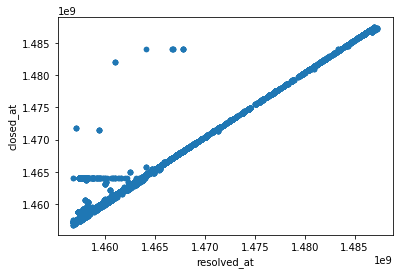

In [165]:
%matplotlib inline
df2.plot.scatter(x="resolved_at",y="closed_at")

## 2. Change date and time to timestamps.

In [85]:
import time, datetime
from datetime import datetime

def time2stamp(cmnt_time):   #转时间戳函数
    cmnt_time=datetime.strptime(cmnt_time,'%d/%m/%Y %H:%M')
    stamp=int(datetime.timestamp(cmnt_time))
    return stamp

In [86]:
df2["resolved_at"].head()

0    29/2/2016 11:29
1    29/2/2016 11:29
2    29/2/2016 11:29
3    29/2/2016 11:29
4     1/3/2016 09:52
Name: resolved_at, dtype: object

In [87]:
df2["resolved_at"] = df2["resolved_at"].apply(time2stamp)

/Users/chenshuyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
df2["closed_at"] = df2["closed_at"].apply(time2stamp)

/Users/chenshuyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
df2["opened_at"] = df2["opened_at"].apply(time2stamp)

/Users/chenshuyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [90]:
sys_created_at_dic = df_to_ddic(dataset, "sys_created_at")
s = dict(sys_created_at_dic)
s["?"]

53076

In [91]:
sys_updated_at_dic = df_to_ddic(dataset, "sys_updated_at")
#print(sys_updated_at_dic)
s2 = dict(sys_updated_at_dic)

In [92]:
resolved_at_dict2 = df_to_ddic(df2,"resolved_at")
r2 = dict(resolved_at_dict2)
if "?" in r2.keys():
    print("True")
else: 
    print("False")

False


In [93]:
df2["sys_updated_at"] = df2["sys_updated_at"].apply(time2stamp)

/Users/chenshuyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


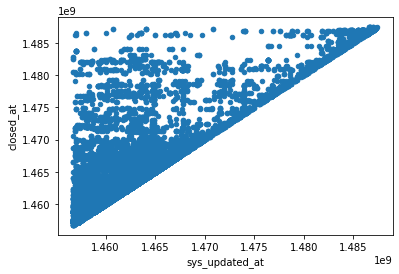

In [94]:
%matplotlib inline
df2.plot.scatter(x="sys_updated_at",y="closed_at")

In [ ]:
# It is not so obvious, those two column is a linear regression, so when choosing the target, "closed_at" 
# column is better as it doesn't have "?" value.

In [95]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138571 entries, 0 to 141711
Data columns (total 31 columns):
number                     138571 non-null object
incident_state             138571 non-null object
active                     138571 non-null bool
reassignment_count         138571 non-null int64
reopen_count               138571 non-null int64
sys_mod_count              138571 non-null int64
made_sla                   138571 non-null bool
caller_id                  138571 non-null object
opened_by                  138571 non-null object
opened_at                  138571 non-null int64
sys_created_by             138571 non-null object
sys_created_at             138571 non-null object
sys_updated_by             138571 non-null object
sys_updated_at             138571 non-null int64
contact_type               138571 non-null object
location                   138571 non-null object
category                   138571 non-null object
subcategory                138571 non-null objec

In [97]:
df2["rest_time2"] = df2.apply(lambda x: x["closed_at"] - x["sys_updated_at"], axis=1)

/Users/chenshuyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [98]:
df2.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at,rest_time2
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,1456704960,...,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,1456741740,1457175600,470220
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,1456704960,...,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,1456741740,1457175600,443220
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,1456704960,...,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,1456741740,1457175600,433860
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,1456704960,...,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,1456741740,1457175600,0
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,1456717200,...,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,1456822320,1457254800,536580


In [99]:
df = df2.drop(["sys_updated_at","closed_at"],axis = 1)

In [100]:
df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,rest_time2
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,1456704960,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,1456741740,470220
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,1456704960,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,1456741740,443220
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,1456704960,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,1456741740,433860
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,1456704960,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,1456741740,0
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,1456717200,...,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,1456822320,536580


# 3. change all the columns with catogory values to label encoder

In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
def convert(data,column):
    number = LabelEncoder()
    data[column] = number.fit_transform(data[column])
    data=data.fillna(-999)
    return data

In [103]:
column = [columns for columns in df]
for i in range(0,len(column)):
    if df[str(column[i])].dtypes == "O":
        convert(df,str(column[i]))
    elif df[str(column[i])].dtypes == "bool":
        convert(df,str(column[i]))

In [104]:
df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,rest_time2
0,0,7,1,0,0,0,1,1412,200,1456704960,...,2,48,0,1,0,0,13,52,1456741740,470220
1,0,8,1,0,0,2,1,1412,200,1456704960,...,2,48,0,1,0,0,13,52,1456741740,443220
2,0,8,1,0,0,3,1,1412,200,1456704960,...,2,48,0,1,0,0,13,52,1456741740,433860
3,0,6,0,0,0,4,1,1412,200,1456704960,...,2,48,0,1,0,0,13,52,1456741740,0
4,1,7,1,0,0,0,1,1412,121,1456717200,...,2,64,224,1,0,0,13,197,1456822320,536580


In [105]:
df["incident_state"].dtypes

dtype('int64')

# 4. Build models

## 4.1 Build model with dataset having 

### 4.1.1 Decision tree

In [106]:
X = df.iloc[:,:-1]

y = df["rest_time2"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y)

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def get_score(algorithme, X_train, X_test, Y_train, Y_test):
    modele     = algorithme.fit(X_train, Y_train)
    score      = modele.score(X_test, Y_test)
    return score

hyperparametres = {#"n_estimators" : 30
                  "max_features"  :  29,
                  "max_depth"     :  50,}
algorithme = DecisionTreeRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
score

0.9199744125853732

### 4.1.2 random forest

In [154]:
X = df.iloc[:,:-1]

y = df["rest_time2"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y)

from sklearn.ensemble import RandomForestRegressor

def get_score(algorithme, X_train, X_test, Y_train, Y_test):
    modele     = algorithme.fit(X_train, Y_train)
    score      = modele.score(X_test, Y_test)
    return score

hyperparametres = {"n_estimators" : 30,
                  "max_features"  :  29,
                  "max_depth"     :  50}
algorithme = RandomForestRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
score

0.9657477613027184

## 4.1.3 GridSearch

In [109]:
from sklearn.model_selection import GridSearchCV

algorithm2 = RandomForestRegressor()
hyperparameters = {
    "n_estimators" : [10,25,50],
    "max_depth"    : [10,20,30],
    "max_features" : [9,10,29]
}

grid_optimization = GridSearchCV(algorithm2, 
                                     hyperparameters, 
                                     cv=5, 
                                     iid=False, )

scores = grid_optimization.fit(X_train, Y_train)

scores.best_score_ , scores.best_estimator_

(0.9635903734916391,
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                       max_features=29, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False))

In [111]:
means = scores.cv_results_['mean_test_score']
params = scores.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))

0.871838  with:   {'max_depth': 10, 'max_features': 9, 'n_estimators': 10}
0.874009  with:   {'max_depth': 10, 'max_features': 9, 'n_estimators': 25}
0.884277  with:   {'max_depth': 10, 'max_features': 9, 'n_estimators': 50}
0.874666  with:   {'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
0.888942  with:   {'max_depth': 10, 'max_features': 10, 'n_estimators': 25}
0.894551  with:   {'max_depth': 10, 'max_features': 10, 'n_estimators': 50}
0.933757  with:   {'max_depth': 10, 'max_features': 29, 'n_estimators': 10}
0.936775  with:   {'max_depth': 10, 'max_features': 29, 'n_estimators': 25}
0.937109  with:   {'max_depth': 10, 'max_features': 29, 'n_estimators': 50}
0.939932  with:   {'max_depth': 20, 'max_features': 9, 'n_estimators': 10}
0.950445  with:   {'max_depth': 20, 'max_features': 9, 'n_estimators': 25}
0.952043  with:   {'max_depth': 20, 'max_features': 9, 'n_estimators': 50}
0.948515  with:   {'max_depth': 20, 'max_features': 10, 'n_estimators': 10}
0.955328  with:   

## 4.1.4 feature importance

In [149]:
feature_list = list(df.columns)

# Get numerical feature importances
importances = list(algorithme.feature_importances_)

In [150]:
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
 
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
 
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: resolved_at          Importance: 0.46
Variable: sys_mod_count        Importance: 0.16
Variable: u_priority_confirmation Importance: 0.11
Variable: number               Importance: 0.09
Variable: opened_at            Importance: 0.08
Variable: active               Importance: 0.04
Variable: incident_state       Importance: 0.01
Variable: caller_id            Importance: 0.01
Variable: assigned_to          Importance: 0.01
Variable: reassignment_count   Importance: 0.0
Variable: reopen_count         Importance: 0.0
Variable: made_sla             Importance: 0.0
Variable: opened_by            Importance: 0.0
Variable: sys_created_by       Importance: 0.0
Variable: sys_created_at       Importance: 0.0
Variable: sys_updated_by       Importance: 0.0
Variable: contact_type         Importance: 0.0
Variable: location             Importance: 0.0
Variable: category             Importance: 0.0
Variable: subcategory          Importance: 0.0
Variable: u_symptom            Importance: 0.0
V

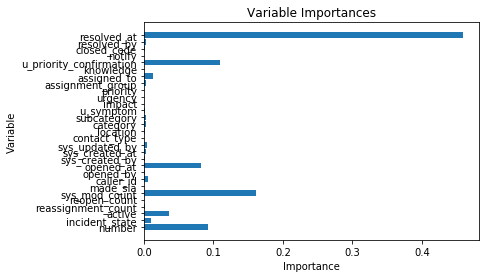

In [151]:
%matplotlib inline
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))

#plt.figure(figsize=(15,7)) 
    
# Make a bar chart
plt.barh(x_values, importances)

# Tick labels for x axis
plt.yticks(x_values, feature_list)#, rotation='horizontal')
 
# Axis labels and title
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Variable Importances')


plt.savefig("variable_importance.png", dpi = 200)

I found that the importance of "resolved_at" is much higher than others, and the raw data showed that "resolved_at" and "closed_at" has a high correlation, so I tried to delete the "resolved_at" column, and built a new model with random forest.

## 4.2 New model without "resolved_at" variable

## 4.2.1 Random forest with dataset without "resolved_at" column

In [163]:
df0 = df.drop(["resolved_at"], axis=1)

In [164]:
X2 = df0.iloc[:,:-1]

y2 = df0["rest_time2"]

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2,y2)

hyperparametres2 = {"n_estimators" : 50,
                    "max_features"  :  28,
                    "max_depth"     :  50}
algorithme2 = RandomForestRegressor(**hyperparametres2)
score2 = get_score(algorithme2, X_train2, X_test2, Y_train2, Y_test2)
score2

0.7731113202985942

## 4.2.2 feature importance

In [159]:
feature_list2 = list(df0.columns)

# Get numerical feature importances
importances2 = list(algorithme2.feature_importances_)

# List of tuples with variable and importance
feature_importances2 = [(feature2, round(importance2, 2)) for feature2, importance2 in zip(feature_list2, importances2)]
 
# Sort the feature importances by most important first
feature_importances2 = sorted(feature_importances2, key = lambda x: x[1], reverse = True)
 
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances2];

Variable: resolved_by          Importance: 0.11
Variable: assignment_group     Importance: 0.1
Variable: number               Importance: 0.07
Variable: caller_id            Importance: 0.07
Variable: sys_created_at       Importance: 0.07
Variable: opened_at            Importance: 0.06
Variable: active               Importance: 0.05
Variable: sys_mod_count        Importance: 0.05
Variable: subcategory          Importance: 0.05
Variable: assigned_to          Importance: 0.05
Variable: incident_state       Importance: 0.04
Variable: location             Importance: 0.04
Variable: category             Importance: 0.04
Variable: opened_by            Importance: 0.03
Variable: sys_updated_by       Importance: 0.03
Variable: u_symptom            Importance: 0.03
Variable: reassignment_count   Importance: 0.02
Variable: sys_created_by       Importance: 0.02
Variable: u_priority_confirmation Importance: 0.02
Variable: closed_code          Importance: 0.02
Variable: reopen_count         Importa

## 4.2.3 new model with important features

In [160]:
df_final2 = df.drop(["reopen_count","made_sla","contact_type","impact","urgency",
                    "priority","knowledge","notify"], axis=1)

In [162]:
X3 = df_final2.iloc[:,:-1]

y3 = df_final2["rest_time2"]

X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3,y3)

hyperparametres3 = {"n_estimators" : 30,
                  "max_features"  :  20,
                  "max_depth"     :  50,}
algorithme3 = RandomForestRegressor(**hyperparametres3)
score3 = get_score(algorithme3, X_train3, X_test3, Y_train3, Y_test3)
score3

0.9650342365241695

## 4.2.4 Heatmap of final variables

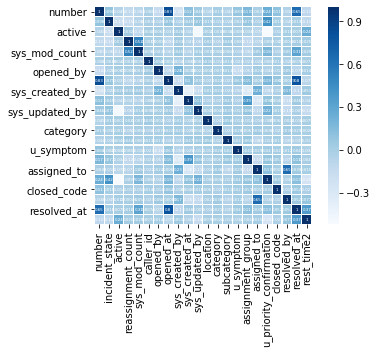

In [169]:
import seaborn as sns
heat = sns.heatmap(df_final2.corr(), square=True,linewidths = 0.05, annot=True, annot_kws={'size':4,'color':'white'}, cmap="Blues")

In [170]:
figure = heat.get_figure()
figure.savefig("heat.png", dpi = 500)

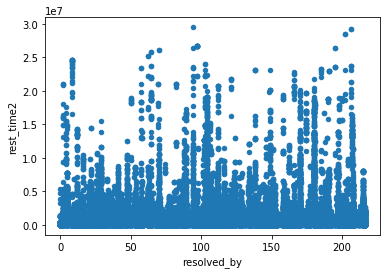

In [172]:
df_final2.plot.scatter(y="rest_time2",x="resolved_by")

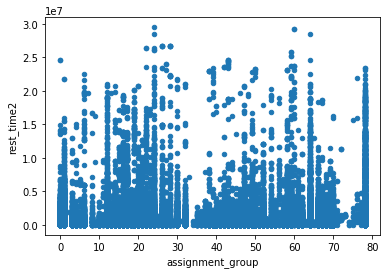

In [173]:
df_final.plot.scatter(y="rest_time2",x="assignment_group")

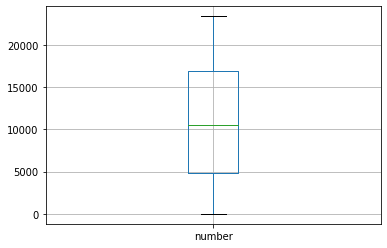

In [184]:
df_final.boxplot(column = ["number"],sym="o",whis=1.5)